#Projeto 2 - Identificação de distribuições
>Análise da amostra de dados de jogos da NFL. Frequência de resultados em jogos.

##Objetivo
O objetivo deste projeto é identificar quais distribuições (funções de densidade de probabilidade - no caso contínuo, ou funções de probabilidade - no caso discreto) descrevem bem as variáveis quantitativas extraídas de datasets.
O resultado final esperado é um relatório que identifique, com bons argumentos, modelos probabilísticos para duas variáveis quantitativas de um ou mais datasets.
##O que deve ser feito
Você precisa escolher duas variáveis quantitativas em datasets públicos de sua escolha. As duas variáveis podem vir do mesmo dataset.
Limpe e prepare os dados para processamento (tratando valores NaN, N/A, por exemplo). Fique atento ao dicionário de dados (se houver) para identificar quais colunas de fato são quantitativas e eventualmente remover valores inválidos.
A seguir, estude as variáveis escolhidas e procure identificar uma função adequada que descreva sua probabilidade de ocorrência.
###Sugerimos que o trabalho siga as seguintes fases:
-Seleção de um dataset e escolha de variáveis quantitativas adequadas

-Indique o dataset e a variável que escolheu no piazza

-Limpeza do dataset, se necessário

-Inspeção visual da distribuição das variáveis escolhidas - usando um histograma, por exemplo

-Formulação de hipóteses sobre a forma da distribuição dos dados

-Tentativa de estimar os parâmetros da família de distribuições escolhida no item acima a partir dos dados

-Análise do histrograma vs. o plot teórico da distribuição

-Análise da frequência relativa acumulada vs. a função de probabilidade acumulada

-Análise do Q-Q-Plot (quantil amostral vs. quantil teórico)

-Teste de aderência para a distribuição

As distribuições do pacote scipy.stats têm uma função chamada fit() que procura estimar os parâmetros a partir do conjunto de dados.
Use o fit() para fazer uma estimativa de parâmetros para algumas distribuições
Compare os parâmetros estimados a partir do fit() com os parâmetros estimados por você no item 5. A curva obtida com os parâmetros do fit() ajusta melhor os dados?
Elabore uma tabela que contrasta cada variável com as distribuições candidatas e a qualidade com que ajustam as amostras da variável.
Justifique por que escolheu suas distribuições candidatas (a forma da distribuição). Os parâmetros já estarão identificados antes.
Não há restrições em relação à base de dados a utilizar, desde que não seja a mesma base da PNAD já usada na disciplina. Aconselha-se evitar variáveis de bases com pequeno tamanho amostral.
Tornamos disponível uma Lista de datasets que pode ajudar nesta fase do trabalho.
Atenção: nem todas as bases de dados desta lista têm variáveis quantitativas, analise com cuidado. Você não precisa ficar restrito a esta lista

In [30]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from numpy import linspace
dados = pd.read_csv("weather_20131231.csv")

>A partir da análise dos histogramas dos dados, uma possível função que parece se encaixar é a Normal,menos provável dado o plot da função da LogNormal.

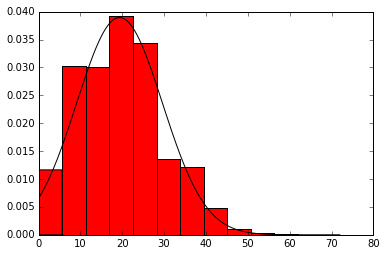

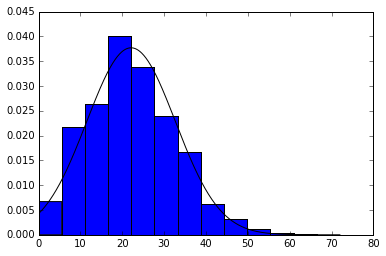

In [27]:
At = linspace(0, 72,720)
Am = dados.away_score.mean()
Av = dados.away_score.var()
plt.hist(x=dados.away_score, bins=linspace(0,dados.away_score.max(),dados.away_score.max()/5), normed=True,color="red")
plt.plot(At, stats.norm.pdf(At, loc=Am, scale=Av**(1/2)), color='black')
#plt.plot(At, stats.lognorm.pdf(At, 1,loc=Am, scale=Hv**(1/2)), color='red')
plt.show()

Hm = dados.home_score.mean()
Hv = dados.home_score.var()
plt.hist(x=dados.home_score, bins=linspace(0,dados.home_score.max(),dados.home_score.max()/5), normed=True)
plt.plot(At, stats.norm.pdf(At, loc=Hm, scale=Hv**(1/2)), color='black')
#plt.plot(At, stats.lognorm.pdf(At, 1,loc=Hm, scale=Hv**(1/2)), color='red')
plt.show()


In [28]:
Acdf = stats.norm.cdf(40, loc=Am, scale=Av**(1/2)) - stats.norm.cdf(10, loc=Am, scale=Av**(1/2))
Apdf = stats.norm.cdf(40, loc=Am, scale=Av**(1/2)) - stats.norm.pdf(10, loc=Am, scale=Av**(1/2))
print(Acdf, Apdf)

0.797265582523 0.952395486662


In [29]:
Hcdf = stats.norm.cdf(40, loc=Hm, scale=Hv**(1/2)) - stats.norm.cdf(10, loc=Hm, scale=Hv**(1/2))
Hpdf = stats.norm.pdf(40, loc=Hm, scale=Hv**(1/2)) - stats.norm.pdf(10, loc=Hm, scale=Hv**(1/2))